# Assignment 02: Wifi Data Analysis:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df=pd.read_excel("C:/Users/vedant.masram/Datasets/Wifi_Data.xlsx")
df

,OBJECTID,Borough,Type,Provider,Latitude,Longitude,Location_T,City,BoroCode,NTACode
0,1,BK,Limited Free,ALTICEUSA,40.658310,-73.944060,Outdoor,Brooklyn,3,BK60
1,2,BK,Limited Free,ALTICEUSA,40.658000,-73.947230,Outdoor,Brooklyn,3,BK60
2,3,BK,Limited Free,ALTICEUSA,40.658000,-73.947230,Outdoor,Brooklyn,3,BK60
3,4,BK,Limited Free,ALTICEUSA,40.657430,-73.947160,Outdoor,Brooklyn,3,BK60
4,5,BK,Limited Free,ALTICEUSA,40.657430,-73.947160,Outdoor,Brooklyn,3,BK60
...,...,...,...,...,...,...,...,...,...,...
2561,2562,MN,Free,LinkNYC - Citybridge,40.748772,-73.988673,Outdoor Kiosk,New York,1,MN17
2562,2563,MN,Free,LinkNYC - Citybridge,40.750087,-73.987781,Outdoor Kiosk,New York,1,MN17
2563,2564,MN,Free,LinkNYC - Citybridge,40.754951,-73.983899,Outdoor Kiosk,New York,1,MN17
2564,2565,MN,Free,LinkNYC - Citybridge,40.762468,-73.974732,Outdoor Kiosk,New York,1,MN17


In [3]:
df.dtypes

OBJECTID        int64
Borough        object
Type           object
Provider       object
Latitude      float64
Longitude     float64
Location_T     object
City           object
BoroCode        int64
NTACode        object
dtype: object

In [4]:
df.set_index("OBJECTID",inplace=True)

In [5]:
df

,Borough,Type,Provider,Latitude,Longitude,Location_T,City,BoroCode,NTACode
OBJECTID,,,,,,,,,
1,BK,Limited Free,ALTICEUSA,40.658310,-73.944060,Outdoor,Brooklyn,3,BK60
2,BK,Limited Free,ALTICEUSA,40.658000,-73.947230,Outdoor,Brooklyn,3,BK60
3,BK,Limited Free,ALTICEUSA,40.658000,-73.947230,Outdoor,Brooklyn,3,BK60
4,BK,Limited Free,ALTICEUSA,40.657430,-73.947160,Outdoor,Brooklyn,3,BK60
5,BK,Limited Free,ALTICEUSA,40.657430,-73.947160,Outdoor,Brooklyn,3,BK60
...,...,...,...,...,...,...,...,...,...
2562,MN,Free,LinkNYC - Citybridge,40.748772,-73.988673,Outdoor Kiosk,New York,1,MN17
2563,MN,Free,LinkNYC - Citybridge,40.750087,-73.987781,Outdoor Kiosk,New York,1,MN17
2564,MN,Free,LinkNYC - Citybridge,40.754951,-73.983899,Outdoor Kiosk,New York,1,MN17


In [6]:
df.isna().sum()

Borough       0
Type          0
Provider      0
Latitude      0
Longitude     0
Location_T    0
City          0
BoroCode      0
NTACode       0
dtype: int64

In [7]:
df.describe()

,Latitude,Longitude,BoroCode
count,2566.000000,2566.000000,2566.000000
mean,40.738396,-73.947564,2.196804
std,0.070845,0.067150,1.282300
min,40.509531,-74.244107,1.000000
25%,40.693069,-73.985954,1.000000
50%,40.743196,-73.958354,2.000000
75%,40.796066,-73.922968,3.000000
max,40.903723,-73.714838,5.000000


In [8]:
df['Provider']=df['Provider'].apply(lambda x: "LinkNYC" if x=="LinkNYC - Citybridge" else x)
df['Provider']=df['Provider'].apply(lambda x: "MD Alliance" if x== "Manhattan Down Alliance" else x)
df['Provider']=df['Provider'].apply(lambda x: "DB" if x=="Downtown Brooklyn" else x)

Q1. Plot the providers vs number of all wi-fi hotspots they have in operation? Who has the highest installations?

In [9]:
ss=df['Provider'].value_counts()
ss

LinkNYC             1134
SPECTRUM             343
Transit Wireless     276
ALTICEUSA            237
Harlem               128
DB                   100
NYPL                  90
QPL                   65
BPL                   59
MD Alliance           36
Chelsea               30
NYCHA                 28
AT&T                  27
City Tech             11
Partner                2
Name: Provider, dtype: int64

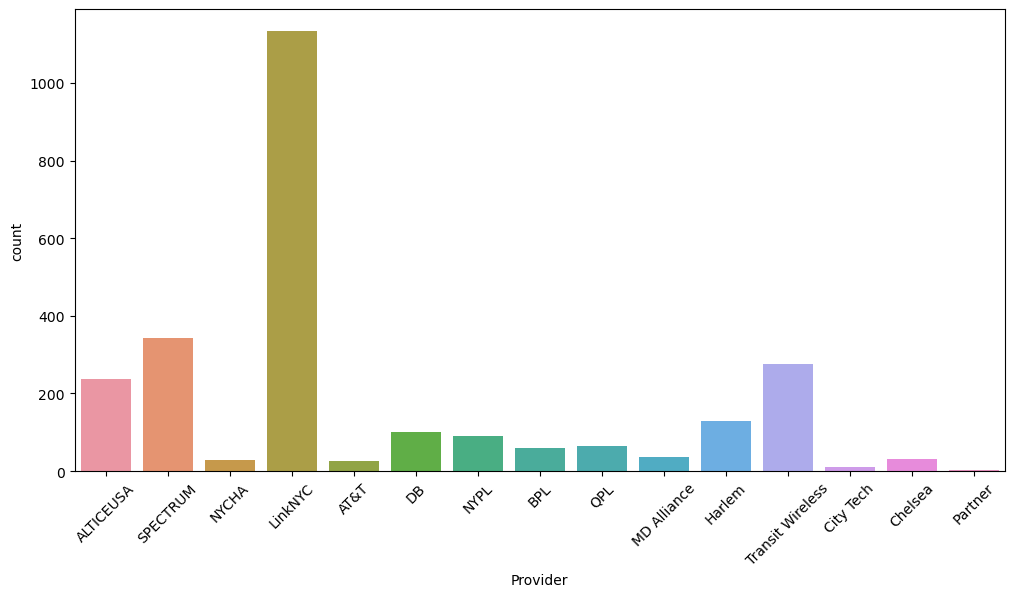

In [10]:
plt.figure(figsize=(12,6))
sb.countplot(x=df["Provider"])
plt.xticks(rotation=45)
plt.show()

In the figure LinkNYC has the highest no of wifi hotspots in operation.  Where LinkNYC is LinkNYC - Citybridge of about 1134.

In [11]:
top=ss.head(5).index.tolist()

In [12]:
top5=df[df["Provider"].isin(top)]
top5

,Borough,Type,Provider,Latitude,Longitude,Location_T,City,BoroCode,NTACode
OBJECTID,,,,,,,,,
1,BK,Limited Free,ALTICEUSA,40.658310,-73.944060,Outdoor,Brooklyn,3,BK60
2,BK,Limited Free,ALTICEUSA,40.658000,-73.947230,Outdoor,Brooklyn,3,BK60
3,BK,Limited Free,ALTICEUSA,40.658000,-73.947230,Outdoor,Brooklyn,3,BK60
4,BK,Limited Free,ALTICEUSA,40.657430,-73.947160,Outdoor,Brooklyn,3,BK60
5,BK,Limited Free,ALTICEUSA,40.657430,-73.947160,Outdoor,Brooklyn,3,BK60
...,...,...,...,...,...,...,...,...,...
2562,MN,Free,LinkNYC,40.748772,-73.988673,Outdoor Kiosk,New York,1,MN17
2563,MN,Free,LinkNYC,40.750087,-73.987781,Outdoor Kiosk,New York,1,MN17
2564,MN,Free,LinkNYC,40.754951,-73.983899,Outdoor Kiosk,New York,1,MN17


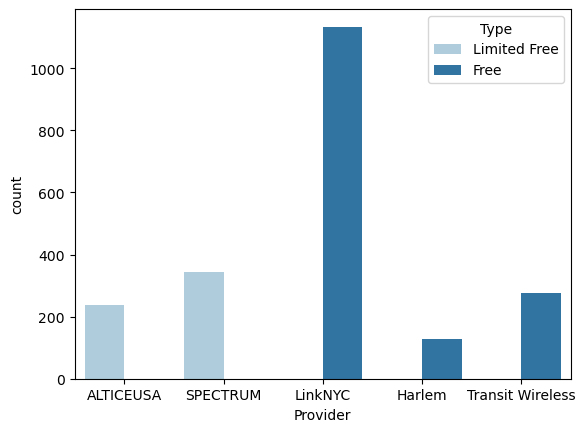

In [59]:
sb.set_palette("Paired")
sb.countplot(data=top5,x="Provider",hue='Type')
plt.show()

# The above graphs depicts the Type of wifi of the the top5 providers.

Q2. Plot providers vs number of free wifi hotspots.

In [14]:
gh=df[df['Type']=="Free"]

In [15]:
gh

,Borough,Type,Provider,Latitude,Longitude,Location_T,City,BoroCode,NTACode
OBJECTID,,,,,,,,,
66,BK,Free,NYCHA,40.695009,-73.979547,Outdoor,Brooklyn,3,BK68
67,BK,Free,NYCHA,40.694623,-73.979909,Outdoor,Brooklyn,3,BK68
68,BK,Free,NYCHA,40.694137,-73.979813,Outdoor,Brooklyn,3,BK68
69,BK,Free,NYCHA,40.694540,-73.979416,Outdoor,Brooklyn,3,BK68
70,BK,Free,NYCHA,40.694626,-73.975180,Outdoor,Brooklyn,3,BK68
...,...,...,...,...,...,...,...,...,...
2562,MN,Free,LinkNYC,40.748772,-73.988673,Outdoor Kiosk,New York,1,MN17
2563,MN,Free,LinkNYC,40.750087,-73.987781,Outdoor Kiosk,New York,1,MN17
2564,MN,Free,LinkNYC,40.754951,-73.983899,Outdoor Kiosk,New York,1,MN17


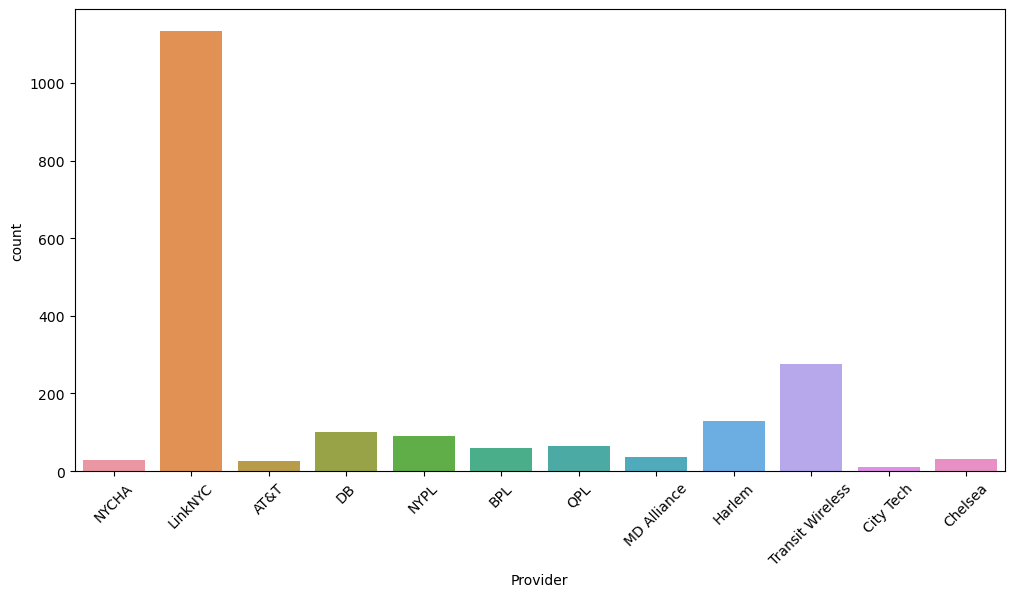

In [16]:
plt.figure(figsize=(12,6))
sb.countplot(x=gh['Provider'])
plt.xticks(rotation=45)
plt.show()

In [17]:
gh.Provider.value_counts()

LinkNYC             1134
Transit Wireless     276
Harlem               128
DB                   100
NYPL                  90
QPL                   65
BPL                   59
MD Alliance           36
Chelsea               30
NYCHA                 28
AT&T                  26
City Tech             11
Name: Provider, dtype: int64

# The above graph and table represents the providers with most free wifi hotspots. Where LinkNYC i.e LinkNYC - Citybridge is the leading one.

Q3. Are there any provider(s) who do not provide free wifi?

In [18]:
no_free_wifi = pd.crosstab(index=df['Provider'], columns=df['Type'])
no_free_wifi.sort_values(by='Free')

Type,Free,Limited Free,Partner Site
Provider,,,
ALTICEUSA,0,237,0
Partner,0,0,2
SPECTRUM,0,343,0
City Tech,11,0,0
AT&T,26,1,0
NYCHA,28,0,0
Chelsea,30,0,0
MD Alliance,36,0,0
BPL,59,0,0


In [19]:
df.Type.unique()

array(['Limited Free', 'Free', 'Partner Site'], dtype=object)

In [20]:
filtered_df = df[(df['Type'] != 'Free wifi')]
pd.set_option('display.max_rows', None)
filtered_df

,Borough,Type,Provider,Latitude,Longitude,Location_T,City,BoroCode,NTACode
OBJECTID,,,,,,,,,
1,BK,Limited Free,ALTICEUSA,40.658310,-73.944060,Outdoor,Brooklyn,3,BK60
2,BK,Limited Free,ALTICEUSA,40.658000,-73.947230,Outdoor,Brooklyn,3,BK60
3,BK,Limited Free,ALTICEUSA,40.658000,-73.947230,Outdoor,Brooklyn,3,BK60
4,BK,Limited Free,ALTICEUSA,40.657430,-73.947160,Outdoor,Brooklyn,3,BK60
5,BK,Limited Free,ALTICEUSA,40.657430,-73.947160,Outdoor,Brooklyn,3,BK60
6,BX,Limited Free,ALTICEUSA,40.846314,-73.824472,Outdoor,Bronx,2,BX10
7,BX,Limited Free,ALTICEUSA,40.847596,-73.822230,Outdoor,Bronx,2,BX99
8,BX,Limited Free,ALTICEUSA,40.848159,-73.821071,Outdoor,Bronx,2,BX10
9,BX,Limited Free,ALTICEUSA,40.848322,-73.820750,Outdoor,Bronx,2,BX10


In [21]:
filtered_df.Provider.unique()

array(['ALTICEUSA', 'SPECTRUM', 'NYCHA', 'LinkNYC', 'AT&T', 'DB', 'NYPL',
       'BPL', 'QPL', 'MD Alliance', 'Harlem', 'Transit Wireless',
       'City Tech', 'Chelsea', 'Partner'], dtype=object)

Q4. Which Location type (Location_T) are most common and least common?

In [22]:
df.Location_T.value_counts()

Outdoor Kiosk         1134
Outdoor                696
Subway Station         276
Library                214
Indoor                 125
Outdoor TWC Aerial     121
Name: Location_T, dtype: int64

In [23]:
counted_data = pd.crosstab(index=df['Type'], columns=df['Location_T'])
counted_data

Location_T,Indoor,Library,Outdoor,Outdoor Kiosk,Outdoor TWC Aerial,Subway Station
Type,,,,,,
Free,0,214,359,1134,0,276
Limited Free,125,0,335,0,121,0
Partner Site,0,0,2,0,0,0


# The above table represents the most common places according to the type of wifi hotspot.

Q5. How many free “indoor” and “outdoor” hotspots are there? Which companies have the highest number of Outdoor Free installations.

In [25]:
ff=df
ff

,Borough,Type,Provider,Latitude,Longitude,Location_T,City,BoroCode,NTACode
OBJECTID,,,,,,,,,
1,BK,Limited Free,ALTICEUSA,40.658310,-73.944060,Outdoor,Brooklyn,3,BK60
2,BK,Limited Free,ALTICEUSA,40.658000,-73.947230,Outdoor,Brooklyn,3,BK60
3,BK,Limited Free,ALTICEUSA,40.658000,-73.947230,Outdoor,Brooklyn,3,BK60
4,BK,Limited Free,ALTICEUSA,40.657430,-73.947160,Outdoor,Brooklyn,3,BK60
5,BK,Limited Free,ALTICEUSA,40.657430,-73.947160,Outdoor,Brooklyn,3,BK60
6,BX,Limited Free,ALTICEUSA,40.846314,-73.824472,Outdoor,Bronx,2,BX10
7,BX,Limited Free,ALTICEUSA,40.847596,-73.822230,Outdoor,Bronx,2,BX99
8,BX,Limited Free,ALTICEUSA,40.848159,-73.821071,Outdoor,Bronx,2,BX10
9,BX,Limited Free,ALTICEUSA,40.848322,-73.820750,Outdoor,Bronx,2,BX10


In [26]:
ff['Location_T']=ff['Location_T'].apply(lambda x: "Indoor" if x == "Library" else x)

In [30]:
ff['Location_T']=ff['Location_T'].apply(lambda x: "Outdoor" if x== "Outdoor" else x)
ff['Location_T']=ff['Location_T'].apply(lambda x: "Outdoor" if x == "Outdoor TWC Aerial" else x)
ff['Location_T']=ff['Location_T'].apply(lambda x: "Outdoor" if x == "Subway Station" else x)
ff['Location_T']=ff['Location_T'].apply(lambda x: "Outdoor" if x == "Outdoor Kiosk" else x)

In [37]:
dd=ff[(ff['Type']=="Free")]
dd

,Borough,Type,Provider,Latitude,Longitude,Location_T,City,BoroCode,NTACode
OBJECTID,,,,,,,,,
66,BK,Free,NYCHA,40.695009,-73.979547,Outdoor,Brooklyn,3,BK68
67,BK,Free,NYCHA,40.694623,-73.979909,Outdoor,Brooklyn,3,BK68
68,BK,Free,NYCHA,40.694137,-73.979813,Outdoor,Brooklyn,3,BK68
69,BK,Free,NYCHA,40.694540,-73.979416,Outdoor,Brooklyn,3,BK68
70,BK,Free,NYCHA,40.694626,-73.975180,Outdoor,Brooklyn,3,BK68
71,BK,Free,NYCHA,40.694892,-73.975416,Outdoor,Brooklyn,3,BK68
72,BK,Free,NYCHA,40.694868,-73.975024,Outdoor,Brooklyn,3,BK68
73,BK,Free,NYCHA,40.694394,-73.975054,Outdoor,Brooklyn,3,BK68
74,BK,Free,NYCHA,40.694557,-73.975336,Outdoor,Brooklyn,3,BK68


In [38]:
dd.Location_T.value_counts()

Outdoor    1769
Indoor      214
Name: Location_T, dtype: int64

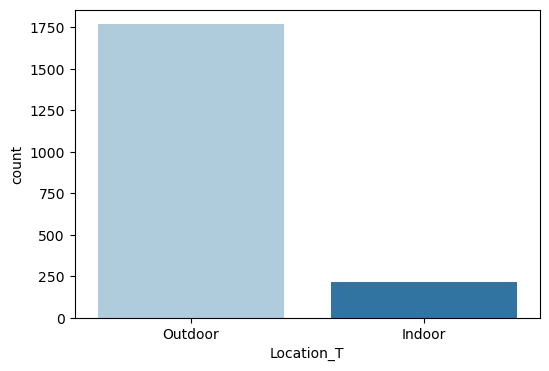

In [53]:
plt.figure(figsize=(6,4))
sb.set_palette("Paired")
sb.countplot(x=gh['Location_T'])
plt.show()

# The above graphs illustrates the distribution of free wifi by providers which are indoor or outdoor valuing outdoor at 214 and 1769 respectively.